In [2]:
#Notebook used to plot measurements from the HACC-Y1 mocks vs theory predictions
%pylab inline
import pylab as plt
import numpy as np
import treecorr
#import matplotlib as plt
path_treecorr='treecorr_output/'
path_CCL='./'

from astropy.io import fits

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


Working on bins 1 1


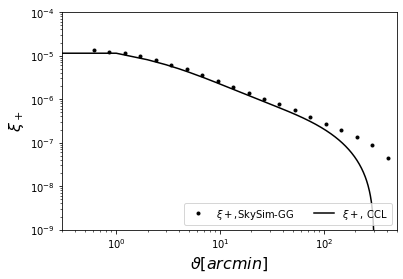

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


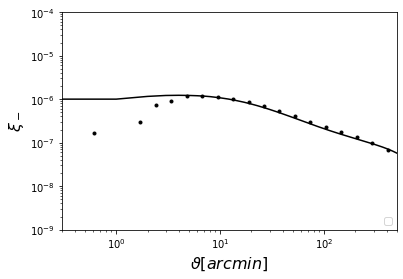

Working on bins 1 2


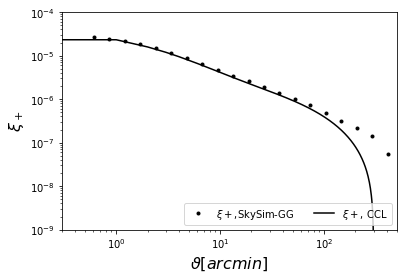

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


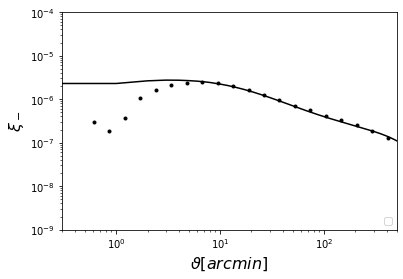

Working on bins 1 3


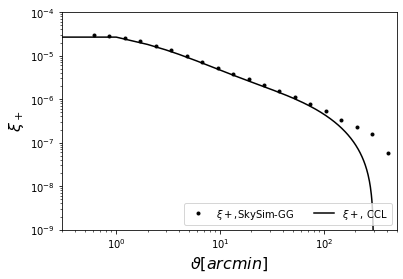

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


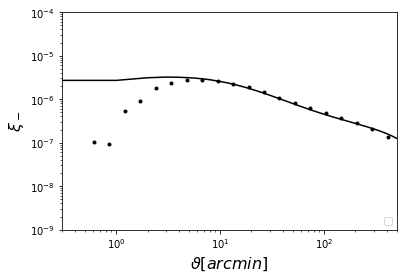

Working on bins 1 4


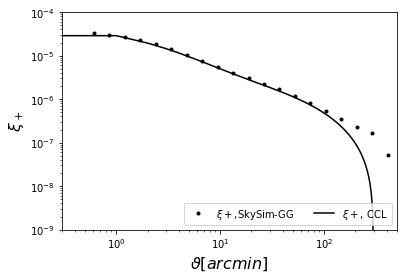

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


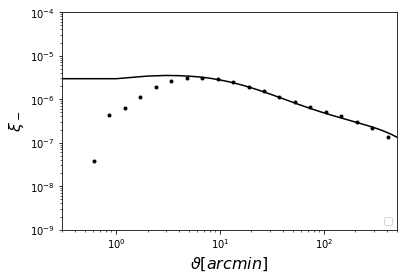

Working on bins 1 5


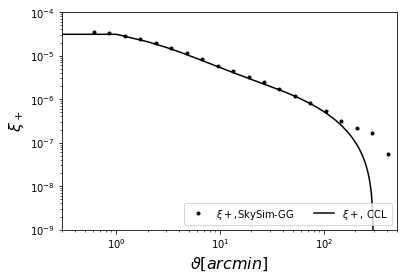

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


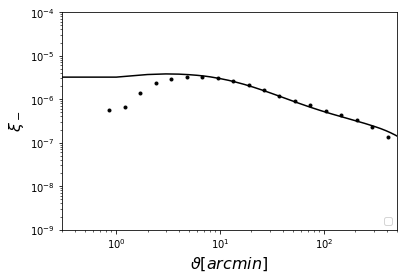

Working on bins 2 2


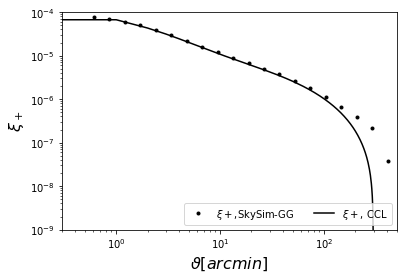

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


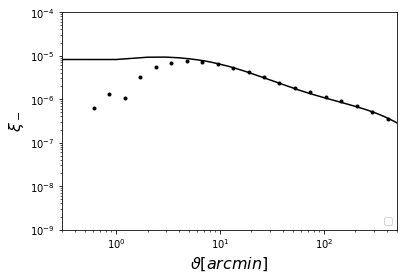

Working on bins 2 3


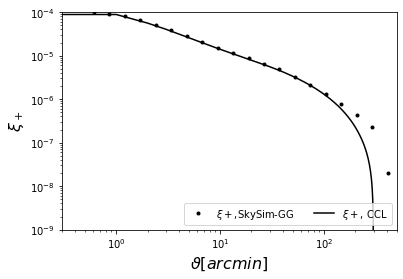

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


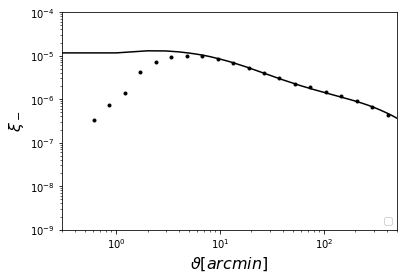

Working on bins 2 4


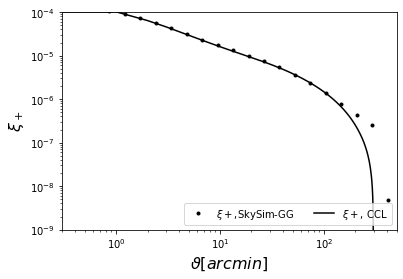

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


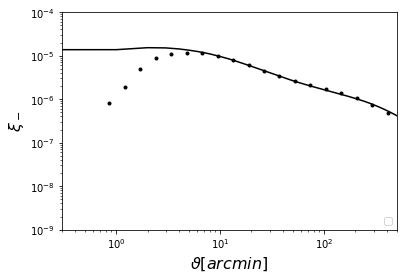

Working on bins 2 5


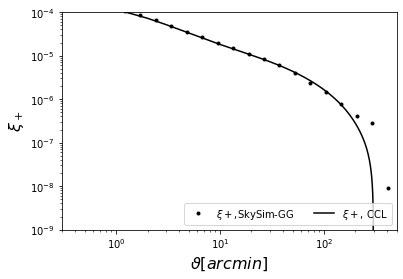

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


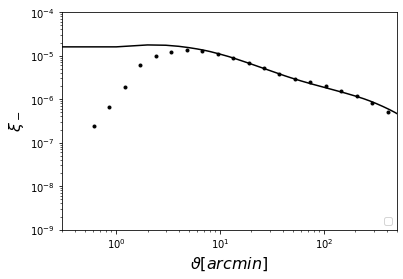

Working on bins 3 3


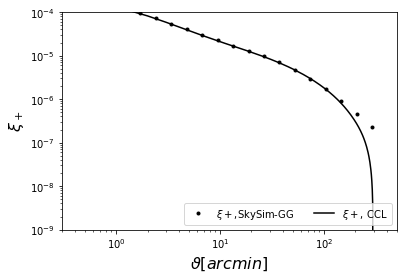

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


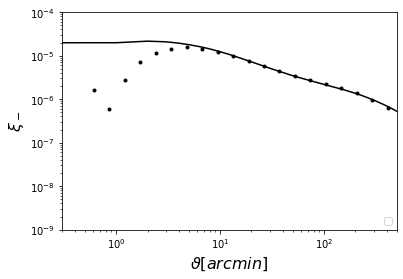

Working on bins 3 4


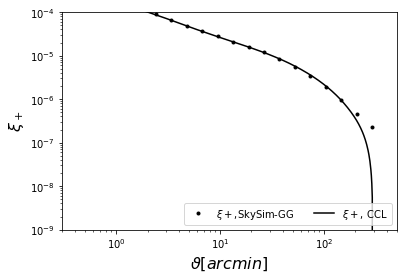

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


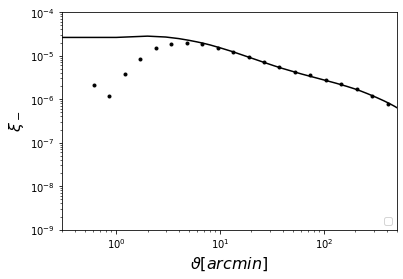

Working on bins 3 5


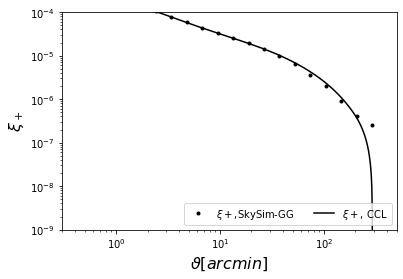

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


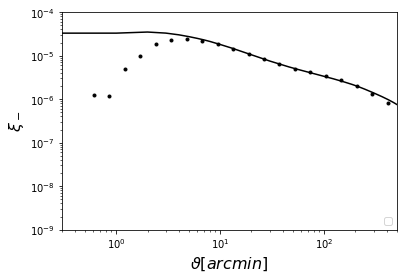

Working on bins 4 4


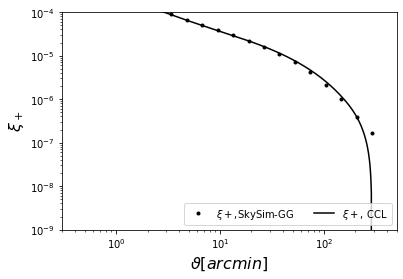

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


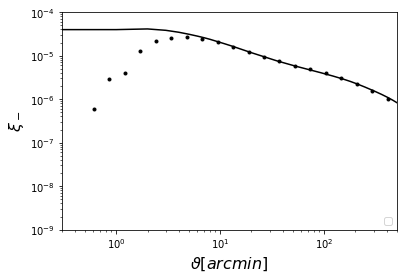

Working on bins 4 5


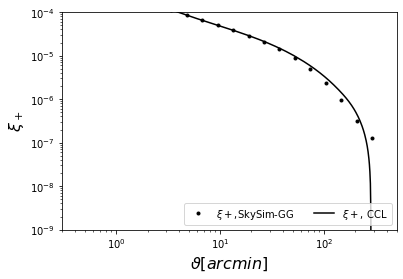

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


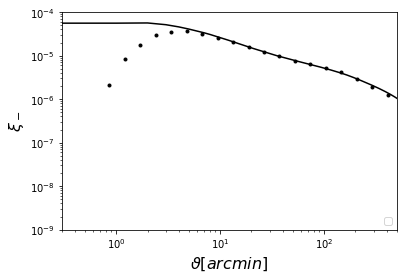

Working on bins 5 5


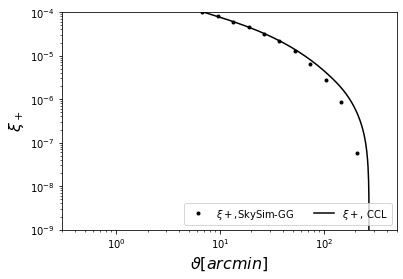

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


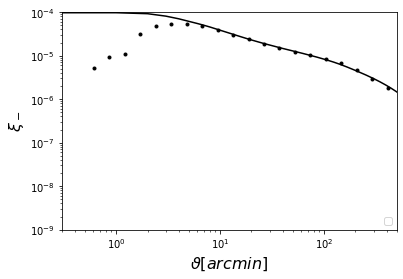

In [4]:
# Load the CCL predictions:
hdul = fits.open(path_CCL+'theo_prediction_1.0_0.0_0.0.fits')
        
data=hdul[1].data
NO_IA_plus_CCL=data['NO IA+'] # Xi + (no ia)
NO_IA_minus_CCL=data['NO IA-'] # Xi - (no ia)
GI_plus_CCL=data['GI+']        #GI + (TATT) 
GI_minus_CCL=data['GI-']       #GI - (TATT)
GI_NLA_plus_CCL=data['GI_NLA+']  #GI + (NLA),
GI_NLA_minus_CCL=data['GI_NLA-']  #GI - (NLA)
II_plus_CCL=data['II+']           #II + (TATT) 
II_minus_CCL=data['II-']         #II -   (TATT)
II_NLA_plus_CCL=data['II_NLA+']  #II +   (NLA)
II_NLA_minus_CCL=data['II_NLA-']     #II -  (NLA)
theta_CCL=data['theta']            # Angular separation(s) in arcmin
z_combination=data['bin_comb']  #redshift bin combination 

# Initialize:

Nbins=int(20)
Ntomo=int(5)
Ntomocomb = int(Ntomo*(Ntomo+1)/2);
counter=0
xip=np.empty([Nbins,Ntomocomb])
xim=np.empty([Nbins,Ntomocomb])
xip_IA=np.empty([Nbins,Ntomocomb])
xim_IA=np.empty([Nbins,Ntomocomb])
xip_pureIA=np.empty([Nbins,Ntomocomb])
xim_pureIA=np.empty([Nbins,Ntomocomb])
xip_GI=np.empty([Nbins,Ntomocomb])
xim_GI=np.empty([Nbins,Ntomocomb])

#Define the correlator, for plotting:
gg = treecorr.GGCorrelation(nbins = Nbins, min_sep=0.5, max_sep=475.5, sep_units='arcmin',bin_slop=0.01)

# test:
#for bin1 in range(1,2):
#    for bin2 in range (bin1,bin1+1):

# autobins only:
#for bin1 in range(1,6):
#    for bin2 in range (bin1,bin1+1):

# all:
for bin1 in np.arange(Ntomo)+1:
    for bin2 in range (bin1,Ntomo+1):

        
        print('Working on bins', bin1, bin2)
 
        # Get Treecorr measurements
        # pure cosmic shear:
        filename=path_treecorr+'cross_correlation_tomo{}_{}'.format(bin1,bin2)
        gg.read(filename)
        xip[:,counter]=gg.xip
        xim[:,counter]=gg.xim       
        theta=gg.meanr     
        
        
        #Get theory (CCL)
        # Find the right column:
        for tomo in range(0,15):
            if(z_combination[tomo][0]==bin2 and z_combination[tomo][1]==bin1 ):
                #print(z_combination[tomo][0], z_combination[tomo][1])
                #print("Will use column",tomo)
                break
                
        theta_CCL=data['theta']
        theta_CCL=theta_CCL[0,:]
        xip_CCL=NO_IA_plus_CCL[tomo,:]
        xim_CCL=NO_IA_minus_CCL[tomo,:]

        #---------
        #plot xi+:
        
        # Sims:
        plt.plot(theta, xip[:,counter], 'k.', label='$\\xi+$,SkySim-GG')
        #CCL:
        plt.plot(theta_CCL, xip_CCL, 'k-', label='$\\xi+$, CCL')
        
        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_+$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.ylim([1e-9, 1e-4])
        plt.show()


        #---------
        #plot xi-: 
        #Sims:
        plt.plot(theta, xim[:,counter], 'k.')#, label='$\\xi-$,SkySim-GG')
        #CCL
        plt.plot(theta_CCL, xim_CCL, 'k-')#, label='$\\xi-$, CCL')

        plt.loglog()
        plt.xlabel('$\\vartheta [arcmin]$', fontsize=16)
        plt.ylabel('$\\xi_-$', fontsize=16)
        plt.legend(loc='lower right', ncol=2, labelspacing=0.1)
        plt.xlim([0.3, 500])
        plt.ylim([1e-9, 1e-4])

        plt.show() 
        
        counter +=1



In [16]:
xip

array([[ 1.48930000e-005,  8.51980000e-005,  1.80450000e-004,
         4.05900000e-004,  3.11261357e-322,  6.03987803e-145,
         3.75452896e-034, -1.79935087e+304,  2.42686412e-226,
         3.07274170e-158,              nan,  7.11044263e-304,
        -4.28067688e+304, -3.43962634e+304,  7.74440457e-121],
       [ 1.28720000e-005,  7.29680000e-005,  1.46360000e-004,
         3.35800000e-004,  6.88519716e-246,              nan,
         1.79894309e-217,  2.31782903e-310,  4.63557073e-310,
         3.42331149e+130,  2.31782903e-310,  4.63557073e-310,
        -9.87170175e+244,  2.31782903e-310,  4.63557073e-310],
       [ 1.10680000e-005,  5.88430000e-005,  1.17580000e-004,
         2.58190000e-004,  2.31778658e-310,  2.31783859e-310,
         9.63341688e-206,  2.31782903e-310,  4.63557073e-310,
         9.70858558e-007,  2.31782903e-310,  4.63557073e-310,
        -8.79455168e-218,  2.31782903e-310,  4.63557073e-310],
       [ 9.05520000e-006,  4.83110000e-005,  9.15600000e-005,
     

In [7]:
xip

array([[ 1.00000000e+000,  1.00000000e+000,  1.00010000e+000,
         1.00020000e+000,  3.11261357e-322,  6.03987803e-145,
         3.75452896e-034, -1.79935087e+304,  2.42686412e-226,
         3.07274170e-158,              nan,  7.11044263e-304,
        -4.28067688e+304, -3.43962634e+304,  7.74440457e-121],
       [ 1.00000000e+000,  1.00000000e+000,  1.00010000e+000,
         1.00020000e+000,  6.88519716e-246,              nan,
         1.79894309e-217,  2.31782903e-310,  4.63557073e-310,
         3.42331149e+130,  2.31782903e-310,  4.63557073e-310,
        -9.87170175e+244,  2.31782903e-310,  4.63557073e-310],
       [ 1.00000000e+000,  1.00000000e+000,  1.00010000e+000,
         1.00010000e+000,  2.31778658e-310,  2.31783855e-310,
         9.63341688e-206,  2.31782903e-310,  4.63557073e-310,
         9.70858558e-007,  2.31782903e-310,  4.63557073e-310,
        -8.79455168e-218,  2.31782903e-310,  4.63557073e-310],
       [ 1.00000000e+000,  1.00000000e+000,  1.00000000e+000,
     